In [95]:
import sys
sys.path.insert(0, '../../')  

import math
import numpy as np
import numpy.typing as npt
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt 
from gasp import train_gasp, run_gasp, simulate_ssfp, simulate_ssfp_simple, sampling, responses, SSFPParams

In [96]:
def compute_condition_number(I):
    I = I.reshape((-1, I.shape[-1]))    # Collapse all dimensions last dimension
    return np.linalg.cond(I)            # Compute condition number

def run_model(D, params, T2base = 0.01, T1T2ratio = 5):
    width = 256
    height = 1
    gradient = 2 * np.pi
    method = 'affine'

    M = simulate_ssfp_simple(width=width, height=height, T1=T1T2ratio * T2base, T2 = T2base, params=params, minTR = np.min(params.TRs), gradient = gradient)
    C = compute_condition_number(M)
    U, s, Vt = np.linalg.svd(M, full_matrices=False)
    R = matrix_rank(M)
    _, A = train_gasp(M, D, method=method)
    I = run_gasp(M, A, method=method)
    MSE = np.sqrt(np.mean((np.abs(I) - D)**2))

    return A, I, MSE, C, U, s, Vt, R

def test_model(A, D, params, T2base = 0.01, T1T2ratio = 5):
    width = 256
    height = 1
    gradient = 2 * np.pi
    method = 'affine'

    M = simulate_ssfp_simple(width=width, height=height, T1=T1T2ratio * T2base, T2 = T2base, params=params, minTR = np.min(params.TRs), gradient = gradient)
    I = run_gasp(M, A, method=method)
    C = compute_condition_number(M)
    U, s, Vt = np.linalg.svd(M, full_matrices=False)
    R = matrix_rank(M)
    _, A1 = train_gasp(M, D, method=method)

    print('test')
    print(np.abs(A)-np.abs(A1))

    I = run_gasp(M, A, method=method)
    MSE = np.sqrt(np.mean((np.abs(I) - D)**2))

    return I, MSE

0.022545594617855325 115695383.98742335 [48]
0.021027950864008316 41132732.785111465 [48]


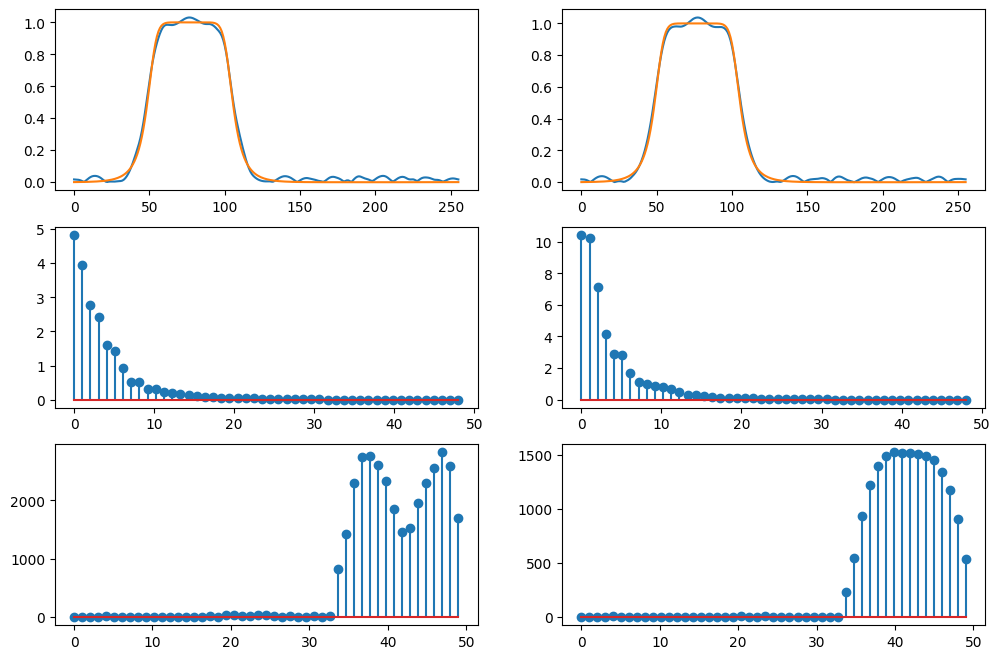

In [97]:
n = 48
width = 256
alpha = np.deg2rad(6)
alpha2 = np.deg2rad(20)
D = responses.bandpass_filter(width, bw=0.1, shift=-0.2)
D2 = responses.bandpass_filter(width, bw=0.1, shift=-0.2)

#D = responses.square(width, 0.2, 0)
#D = responses.gaussian(width, 0.5, 0)

TRs, PCs = sampling.grid_TR_sampling(n_points=n, TRs=[5e-3, 10e-3, 20e-3])
params = SSFPParams(n, alpha, TRs, PCs)
A, I, MSE, C, U, s, Vt, R = run_model(D, params)
print(MSE, C, R)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0,0].plot(np.abs(I[0]))
axs[0,0].plot(D)
x = np.linspace(0, n, n)
axs[1,0].stem(x, s[0])
x = np.linspace(0, n+1, n+1)
axs[2,0].stem(x, np.abs(A))

TRs, PCs = sampling.grid_TR_sampling(n_points=n, TRs=[5e-3, 10e-3, 20e-3])
params = SSFPParams(n, alpha2, TRs, PCs)
A, I, MSE, C, U, s, Vt, R = run_model(D2, params)
print(MSE, C, R)

axs[0,1].plot(np.abs(I[0]))
axs[0,1].plot(D2)
x = np.linspace(0, n, n)
axs[1,1].stem(x, s[0])
x = np.linspace(0, n+1, n+1)
axs[2,1].stem(x, np.abs(A))
plt.show()

0.009293953908323863 2750.3104542464 [48]
test
[-3.45176133e-07 -8.26482869e-01 -7.98031307e-01 -5.78365533e-01
 -8.42875548e-01 -6.92072067e-01 -8.19311041e-01 -6.88723897e-01
 -1.00600468e+00 -9.83558727e-01 -1.44513259e+00 -1.65550109e+00
 -2.37909872e+00 -3.11526850e+00 -4.33974308e+00 -4.58376517e+00
 -2.63418507e+00 -1.25859156e+01 -1.28252294e+01 -1.16313410e+01
 -9.82673220e+00 -8.08462341e+00 -6.63131215e+00 -5.46927799e+00
 -4.60022995e+00 -3.94062642e+00 -3.58817924e+00 -3.33726526e+00
 -3.47436423e+00 -3.63072323e+00 -5.98497015e+00 -8.42428055e+00
 -1.05892653e+01 -3.48421100e+03 -3.78243390e+03 -3.82789443e+03
 -3.66380679e+03 -3.37125873e+03 -3.02135405e+03 -2.66107493e+03
 -2.31793118e+03 -2.00480235e+03 -1.73796139e+03 -1.53721496e+03
 -1.45258204e+03 -1.55449734e+03 -1.88028525e+03 -2.39198126e+03
 -2.97663651e+03]
0.1049723921103044 2750.3104542464 [48]


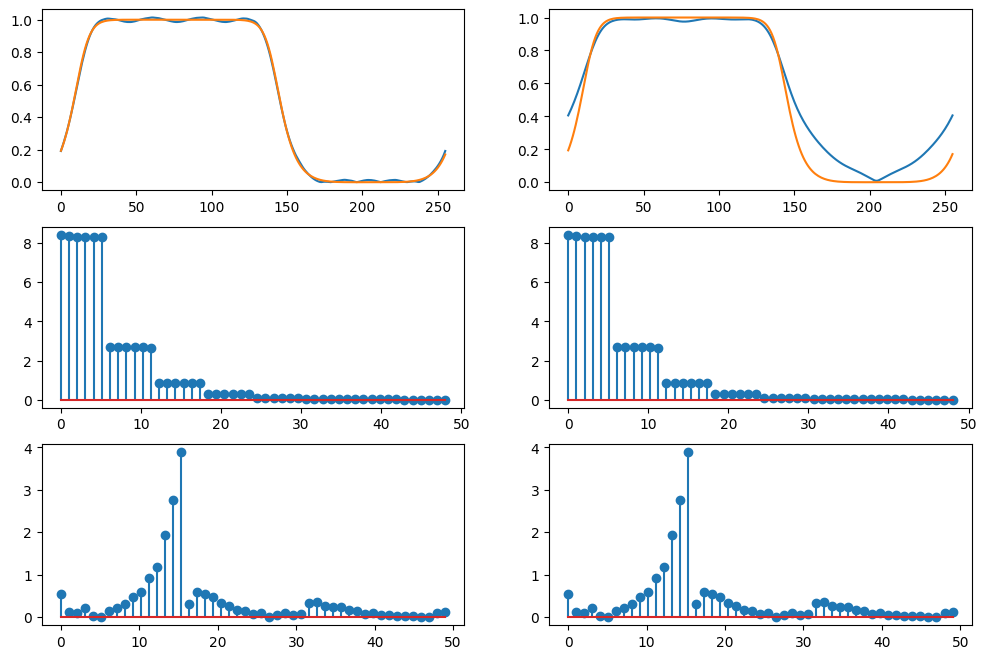

In [98]:
n = 48
width = 256
alpha = np.deg2rad(30)
#alpha2 = np.deg2rad(30)
T1T2ratio = 5
#T1T2ratio2 = 5
D = responses.bandpass_filter(width, bw=0.25, shift=-0.2)
D2 = responses.bandpass_filter(width, bw=0.25, shift=-0.2)

#D = responses.square(width, 0.2, 0)
#D = responses.gaussian(width, 0.5, 0)

TRs, PCs = sampling.grid_TR_sampling(n_points=n, TRs=[5e-3, 10e-3, 20e-3])
params = SSFPParams(n, alpha, TRs, PCs)
A, I, MSE, C, U, s, Vt, R = run_model(D, params, T1T2ratio)
print(MSE, C, R)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0,0].plot(np.abs(I[0]))
axs[0,0].plot(D)
x = np.linspace(0, n, n)
axs[1,0].stem(x, s[0])
x = np.linspace(0, n+1, n+1)
axs[2,0].stem(x, np.abs(A))

# Error: Wierd behavior with the model
#TRs, PCs = sampling.grid_TR_sampling(n_points=n, TRs=[5e-3, 10e-3, 20e-3])
#params = SSFPParams(n, alpha2, TRs, PCs)
I, MSE = test_model(A, D, params, T1T2ratio=T1T2ratio)
print(MSE, C, R)

axs[0,1].plot(np.abs(I[0]))
axs[0,1].plot(D2)
x = np.linspace(0, n, n)
axs[1,1].stem(x, s[0])
x = np.linspace(0, n+1, n+1)
axs[2,1].stem(x, np.abs(A))
plt.show()